#**Stock Market Analysis and Prediction**

####**import and load**

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
data = pd.read_csv('/content/sample_data/AAPL.csv')
data.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-07-24,193.410004,194.910004,192.250000,192.750000,191.731750,45377800
1,2023-07-25,193.330002,194.440002,192.919998,193.619995,192.597153,37283200
2,2023-07-26,193.669998,195.639999,193.320007,194.500000,193.472519,47471900
3,2023-07-27,196.020004,197.199997,192.550003,193.220001,192.199280,47460200
4,2023-07-28,194.669998,196.630005,194.139999,195.830002,194.795486,48291400


In [32]:
data.shape

(250, 7)

In [33]:
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       250 non-null    object 
 1   Open       250 non-null    float64
 2   High       250 non-null    float64
 3   Low        250 non-null    float64
 4   Close      250 non-null    float64
 5   Adj Close  250 non-null    float64
 6   Volume     250 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.8+ KB


####**Data Cleaning**

In [35]:
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

####**Data Processing**

In [36]:
# Prepare a date into Data frame
data['Date'] = pd.to_datetime(data['Date'])
data['Date'].head(5)

0   2023-07-24
1   2023-07-25
2   2023-07-26
3   2023-07-27
4   2023-07-28
Name: Date, dtype: datetime64[ns]

In [37]:

# Extracting year in Date
data['Year'] = data['Date'].dt.year
data['Year'].head(5)

0    2023
1    2023
2    2023
3    2023
4    2023
Name: Year, dtype: int32

In [38]:
# Extracting Month in Date
data['Month'] = data['Date'].dt.month
data['Month'].head()

0    7
1    7
2    7
3    7
4    7
Name: Month, dtype: int32

In [39]:
# Extracting year in Date
data['Day'] = data['Date'].dt.day
data['Day'].head()

0    24
1    25
2    26
3    27
4    28
Name: Day, dtype: int32

####**Analysing Data**

<Axes: xlabel='Year', ylabel='count'>

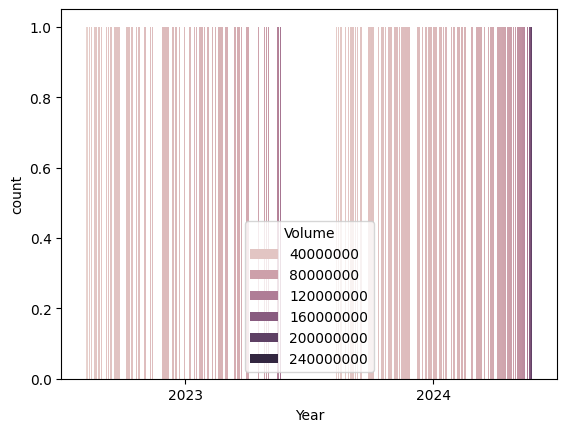

In [40]:
sns.countplot(x = data['Year'],hue = 'Volume', data = data)

<Axes: xlabel='Month', ylabel='count'>

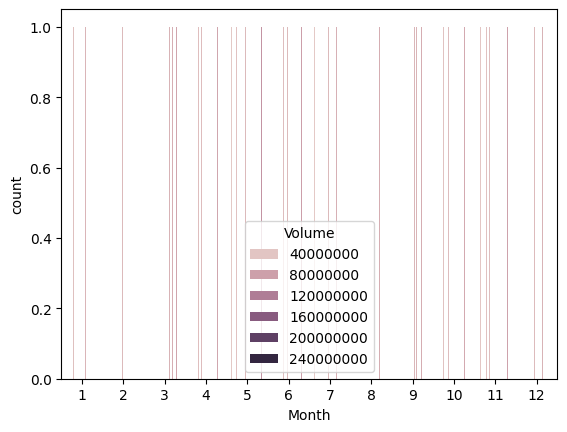

In [41]:
sns.countplot(x = data['Month'],hue = 'Volume', data = data)

<Axes: xlabel='Day', ylabel='count'>

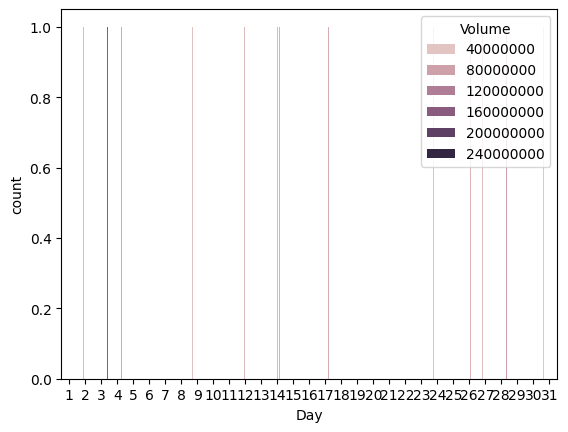

In [42]:
sns.countplot(x = data['Day'],hue = 'Volume', data = data)

<Axes: xlabel='Day', ylabel='High'>

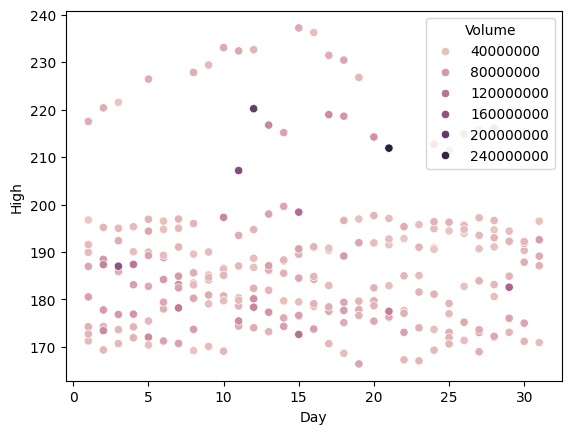

In [43]:
sns.scatterplot(x = data['Day'], y = 'High', hue = 'Volume',data = data)

<Axes: xlabel='Day', ylabel='Low'>

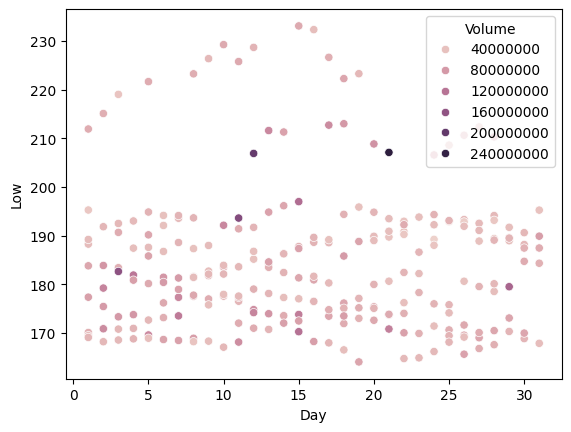

In [44]:
sns.scatterplot(x = data['Day'], y = 'Low', hue = 'Volume', data = data)

<Axes: xlabel='Open', ylabel='Close'>

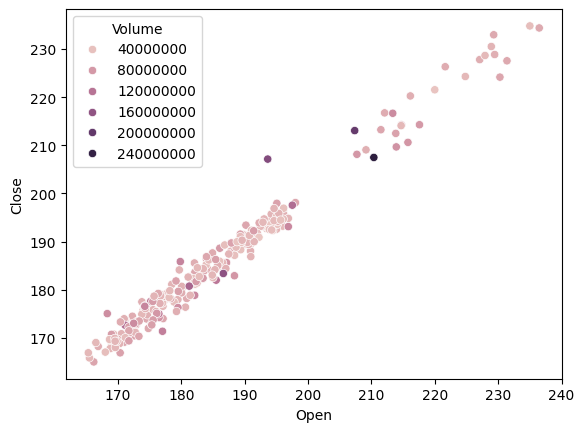

In [45]:
sns.scatterplot(x = 'Open', y = 'Close', hue = 'Volume', data = data)

####**Data Wrangling**

In [46]:
data = data.drop(['Date', 'Adj Close'], axis = 1)

In [47]:
data.isnull().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
Year      0
Month     0
Day       0
dtype: int64

In [48]:
data.head()

,Open,High,Low,Close,Volume,Year,Month,Day
0,193.410004,194.910004,192.250000,192.750000,45377800,2023,7,24
1,193.330002,194.440002,192.919998,193.619995,37283200,2023,7,25
2,193.669998,195.639999,193.320007,194.500000,47471900,2023,7,26
3,196.020004,197.199997,192.550003,193.220001,47460200,2023,7,27
4,194.669998,196.630005,194.139999,195.830002,48291400,2023,7,28


####**Feature Engineering**

In [49]:
from sklearn.model_selection import train_test_split

# Split data
X = data.drop('Close', axis = 1)
y = data['Close']

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [51]:
# Train model
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

In [52]:
model.fit(X_train, y_train)

RandomForestRegressor()

In [53]:
predictions = model.predict(X_test)

In [54]:
from sklearn.metrics import classification_report

In [55]:
# Convert to integers if necessary
y_test = y_test.astype(int)
predictions = predictions.astype(int)

In [57]:
classification_report(y_test, predictions)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

'              precision    recall  f1-score   support\n\n         166       0.00      0.00      0.00         1\n         167       0.00      0.00      0.00         1\n         168       0.50      0.33      0.40         3\n         169       0.50      0.67      0.57         3\n         170       0.67      0.50      0.57         4\n         171       0.33      0.50      0.40         4\n         172       0.00      0.00      0.00         2\n         173       0.00      0.00      0.00         1\n         174       0.25      0.50      0.33         2\n         175       0.00      0.00      0.00         3\n         176       0.00      0.00      0.00         1\n         177       0.00      0.00      0.00         2\n         178       0.00      0.00      0.00         4\n         179       0.00      0.00      0.00         1\n         180       0.33      1.00      0.50         1\n         181       1.00      0.25      0.40         4\n         182       0.50      1.00      0.67         2\n       

In [58]:
from sklearn.metrics import confusion_matrix

In [59]:
confusion_matrix(y_test, predictions)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]])

In [60]:
from sklearn.metrics import accuracy_score

In [61]:
accuracy_score(y_test, predictions)

0.28

####**Conclusion**
This data is collected from the Yahoo finance.